# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** Beatriz Borges, Lara Orlandić, Nikolina Tomić  
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [3]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [23]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer 
value.


The analytical expression of the discriminant function, using Bayes method, is given by:
 
\begin{equation}
\begin{split}
g_{i}(x) &= ln \left( p \left( x | w_{i} \right) \cdot p \left( w_{i} \right) \right) \\ 
&= ln \left( p \left( x | w_{i} \right) \right)  + ln \left( p \left( w_{i} \right) \right)
\end{split}
\end{equation}

Where $p(x | w_i)$ represents probability density function (*PDF*), and $p(w_i)$ is the prior probability of class *i*. This simply means that a sample *x* is assigned to the most probable class. For two classes, *i* and *j*, the separation curve is the set of points where: $$g_i = g_j$$. <br>
Let's now consider what type of *PDF* the data can be described with in order to apply Bayes rule. We first visualize the distribution with a histogram to roughly get insight in distribution type. We also show a qq plot to examine whether or not the classes can be described using Gaussian distributions.<br>

In [13]:
from scipy.stats import shapiro

def sw_test(data,name):
    stat=[]
    pval=[]
    for i in range(0,2):        
        s, p = shapiro(data[:,i])
        print('Statistics=%.3f, p=%.3f' % (s, p))
        stat=np.append(stat,s)
        pval=np.append(pval,p)
    alpha = 0.05
    if pval[0] > alpha and pval[1] > alpha:
        print('Shapiro-Wilk Test: sample ' +name + ' looks Gaussian (fail to reject H0)')
    else:
        print('Shapiro-Wilk Test: sample ' +name + ' does not look Gaussian (reject H0)')

In [14]:
from scipy.stats import normaltest

def da_test(data,name):
    stat=[]
    pval=[]
    for i in range(0,2):        
        s, p = normaltest(data[:,i])
        print('Statistics=%.3f, p=%.3f' % (s, p))
        stat=np.append(stat,s)
        pval=np.append(pval,p)
    
    alpha = 0.05
    if pval[0] > alpha and pval[1] > alpha:
        print('D’Agostino’s K2 Test: sample ' +name + ' looks Gaussian (fail to reject H0)')
        print('\n')
    else:
        print('D’Agostino’s K2 Test: sample ' +name + ' does not look Gaussian (reject H0)')
        print('\n')

In [15]:
from statsmodels.graphics.gofplots import qqplot

def show_hist(f,name):
    figs,axs= plt.subplots(1,4,figsize=(17,3))
    axs[0].hist(f[:,0])
    axs[0].set_title('1D histogram - '+ name)
    qqplot(f[:,0], line='s',ax=axs[1])
    axs[1].set_title('qq plot - '+ name)
    axs[2].hist(f[:,1])
    axs[2].set_title('1D histogram - '+ name)
    qqplot(f[:,1], line='s',ax=axs[3])
    axs[3].set_title('qq plot - ' + name)

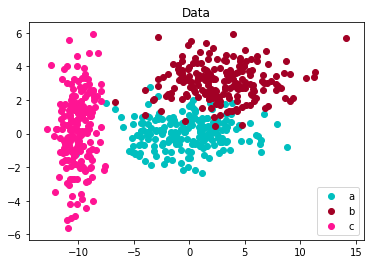

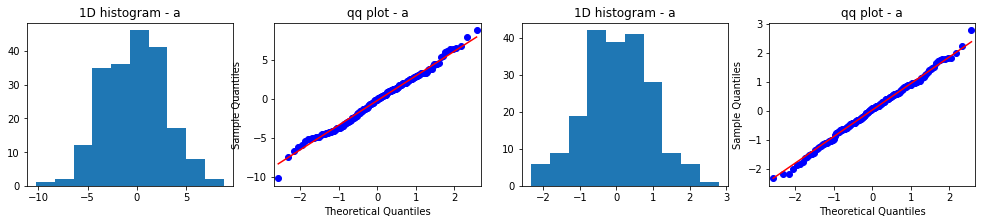

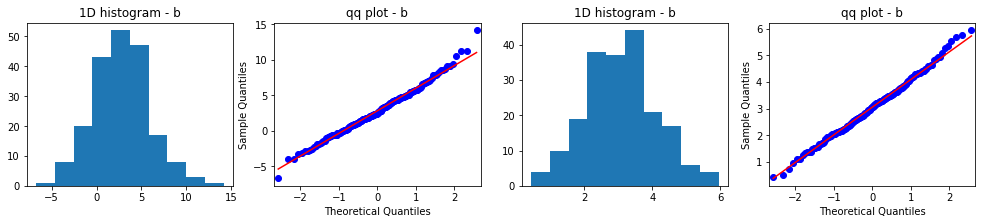

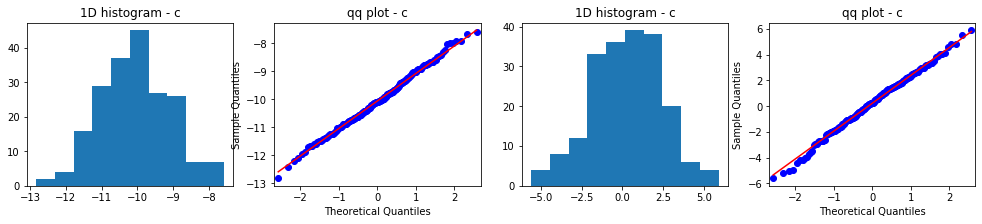

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(a[:,0],a[:,1],color='c')
plt.scatter(b[:,0],b[:,1],color='#a20025')
plt.scatter(c[:,0],c[:,1],color='#FF1493')
plt.legend(('a','b','c'))
plt.title('Data')

show_hist(a,'a')
show_hist(b,'b')
show_hist(c,'c')

One can observe from the histograms and qq plots that the classes are likely to come from a normal distribution. We thus apply two statistical tests: *Shapiro-Wilk Test* and *D’Agostino’s K-squared Test* to analytically prove it.

In [17]:
print('Sample a, statistical tests:')
sw_test(a,'a')
da_test(a,'a')

print('\nSample b, statistical tests:')
sw_test(b,'b')
da_test(b,'b')

print('\nSample c, statistical tests:')
sw_test(c,'c')
da_test(c,'c')

Sample a, statistical tests:
Statistics=0.994, p=0.566
Statistics=0.997, p=0.952
Shapiro-Wilk Test: sample a looks Gaussian (fail to reject H0)
Statistics=0.071, p=0.965
Statistics=0.089, p=0.956
D’Agostino’s K2 Test: sample a looks Gaussian (fail to reject H0)



Sample b, statistical tests:
Statistics=0.992, p=0.381
Statistics=0.995, p=0.794
Shapiro-Wilk Test: sample b looks Gaussian (fail to reject H0)
Statistics=5.455, p=0.065
Statistics=1.085, p=0.581
D’Agostino’s K2 Test: sample b looks Gaussian (fail to reject H0)



Sample c, statistical tests:
Statistics=0.996, p=0.866
Statistics=0.996, p=0.850
Shapiro-Wilk Test: sample c looks Gaussian (fail to reject H0)
Statistics=0.516, p=0.772
Statistics=0.815, p=0.665
D’Agostino’s K2 Test: sample c looks Gaussian (fail to reject H0)




Once again, we have shown that the samples come from a normal distribution. We can now calculate mean and covariance matrices. We also visualize Gaussians and isolines. Finally, we can give the expression for the discriminant function.

covariance      mean
[[10.  0.]
 [ 0.  1.]] [-0.21000115  0.03048009] -class1
[[10.  0.]
 [ 0.  1.]] [2.8018991 3.0535643]     -class2
[[1. 0.]
 [0. 5.]] [-10.05748461   0.22582978]  -class3


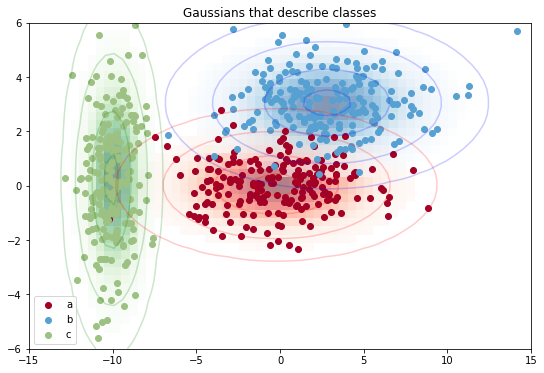

In [20]:
mu1=np.mean(a,axis=0)
mu2=np.mean(b,axis=0)
mu3=np.mean(c,axis=0)

cov1=np.round(np.cov(np.transpose(a)))
cov2=np.round(np.cov(np.transpose(b)))
cov3=np.round(np.cov(np.transpose(c)))

print('covariance', '     mean')
print(cov1, mu1, '-class1')
print(cov2, mu2, '    -class2')
print(cov3, mu3, ' -class3')

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(a[:,0],a[:,1],color='#a20025')
ax.scatter(b[:,0],b[:,1],color='#57a0d2')
ax.scatter(c[:,0],c[:,1],color='#9dc183')
plt.legend(('a','b','c'))

xlim = (-15, 15)
ylim = (-6, 6)

X=np.concatenate((a,b),axis=0)
X=np.concatenate((X,c),axis=0)
y1=np.zeros((1,200))
y2=np.ones((1,200))
y3=2*np.ones((1,200))
y=np.concatenate((y1,y2),axis=1)
y=np.concatenate((y,y3),axis=1)
# code taken from https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Gaussian-Naive-Bayes
#and the modified
xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue', 'green']):
    mask = (y == label)
    mask=mask[0]
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)
ax.set_title('Gaussians that describe classes')
plt.show()

The general discriminant function $g(i)$ in case of Gaussian distribution with Σ and μ is given by: 

\begin{equation}
\begin{split}
g_{i}(x) &= ln \left( p \left( x_{i} | w_{i} \right) \cdot p \left( w_{i} \right) \right) \\ 
&= ln \left( p \left( X | w_{i} \right) \right)  + ln \left( p \left( w_{i} \right) \right) \\ 
&= - \frac{1}{2} \left( X - \mu_{i} \right)^{T} \Sigma_{i}^{-1} \left( X - \mu_{i} \right) +  ln \left( p \left( w_{i} \right) \right) - \frac{1}{2} ln \left| \Sigma_{i} \right| - \frac{d}{2} ln \left( 2 \pi \right) \\  
&= - \frac{1}{2} \left( X - \mu_{i} \right)^{T} \Sigma_{i}^{-1} \left( X - \mu_{i} \right) +  ln \left( p \left( w_{i} \right) \right) - \frac{1}{2} ln \left| \Sigma_{i} \right|
\end{split}
\end{equation}

Since the factor $\frac{d}{2}*ln(2*pi)$ is constant, it does have to be taken into account. Furthermore, in our case, the prior probabilities $p(w_i)$ are the same for three classes, they also do not impact the result.  As this is a general term, it can be applied to calculate the  boundary between all three classes. It can, however, be simplified in case of classifying class  `a` versus `b`, due to the equal covariance matrices.<br>
Suppose we want to distinguish only class `a` and `b`. The quadratic term as well as $-\frac{1}{2}* ln(|\Sigma|)$ from the equation dissapear, and the discriminant function becomes:

\begin{equation}
\begin{split}
g_i(\mathbf{x}) = \frac{1}{2} X^T \boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_i -\frac{1}{2}\boldsymbol{\mu}_i^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_i + \frac{1}{2}\boldsymbol{\mu}_i^T\boldsymbol{\Sigma}^{-1}X + \ln p(w_i)
\end{split}
\end{equation}

Here we see that decision boundary between `a` and `b` should actually be a line. Indeed, it is shown with the results.

In [12]:
#import math
def calculate_decision(mu1,mu2,mu3, sigma1,sigma2,sigma3, prior1,prior2,prior3,inverse1,inverse2,inverse3,d1,d2,d3,xx,yy):
    """This function implements calculation of discriminant functions for 3-class.
    It returns values for all 3 of them, g1,g2 and g3"""   
    x=np.array([xx,yy]).reshape(2,1)    
    W1=-0.5*inverse1
    w1=np.dot(inverse1,mu1)#2x1
    w10=-0.5*np.dot(np.dot(mu1.reshape(1,2),inverse1),mu1)-0.5*np.log(d1)+np.log(prior1)
    g1=np.dot(np.dot(x.reshape(1,2),W1),x)+np.dot(w1.reshape(1,2),x)+w10

    W2=-0.5*inverse2
    w2=np.dot(inverse2,mu2)#2x1
    w20=-0.5*np.dot(np.dot(mu2.reshape(1,2),inverse2),mu2)-0.5*np.log(d2)+np.log(prior2)
    g2=np.dot(np.dot(x.reshape(1,2),W2),x)+np.dot(w2.reshape(1,2),x)+w20

    W3=-0.5*inverse3
    w3=np.dot(inverse3,mu3)#2x1
    w30=-0.5*np.dot(np.dot(mu3.reshape(1,2),inverse3),mu3)-0.5*np.log(d3)+np.log(prior3)
    g3=np.dot(np.dot(x.reshape(1,2),W3),x)+np.dot(w3.reshape(1,2),x)+w30        

    return np.array([g1,g2,g3])        

In [13]:
#to run this codes will take a while
#calculate priors, they are the same in our case
prior1=len(a)/600
prior2=len(b)/600
prior3=len(c)/600
N = 1000
#create a space of 1000x1000 points  
X = np.linspace(-15, 15, N)
Y = np.linspace(-6, 6, N)
X, Y = np.meshgrid(X, Y)
z=[]
#calculate parameters only once to speed up calculation of discriminant functions
inverse1=np.linalg.inv(cov1)
inverse2=np.linalg.inv(cov2)
inverse3=np.linalg.inv(cov3)
d1=np.linalg.det(cov1)
d2=np.linalg.det(cov2)
d3=np.linalg.det(cov3)
# calculate discriminant functions for all points and extract argmax  - which class givs the larger discriminant
z = np.array(  [np.argmax(calculate_decision(mu1.reshape(2,1),mu2.reshape(2,1),mu3, cov1,cov2,cov3, prior1,prior2,prior3,
                                        inverse1,inverse2,inverse3,d1,d2,d3,xx,yy)) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = z.reshape(X.shape)

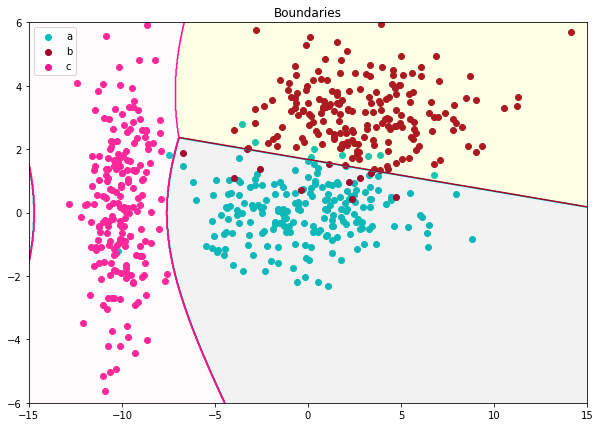

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(a[:,0],a[:,1],color='c')
plt.scatter(b[:,0],b[:,1],color='#a20025')
plt.scatter(c[:,0],c[:,1],color='#FF1493')
plt.legend(('a','b','c'))
#plot contour that represents boundaries between classes according to calculation in the previous cell
plt.contour( X, Y, Z, 2, alpha = 1, colors = ('cyan','#a20025','#FF1493'))
plt.contourf( X, Y, Z, 2, alpha = .1, colors = ('gray','yellow','#ffdde2ff'))
plt.title('Boundaries')
plt.show()

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.


The **Mahalanobis distance** is a multi-variate distance measure. It takes into account the matrix of distances and the variance-covariance matrix.

Mathematically, given a cluster of points, where each point has coordinates $x_{1}$, $x_{2}$, ...$x_{n}$, the Mahalanobis distance, $D$, of point $p$ to that cluster is given by: 
$ D = \sqrt{M_{D}^{T} \cdot S^{-1} \cdot M_{D}}$,
where $M_{D} = \begin{bmatrix}
    p_1 \\
    p_2 \\
    \vdots \\
    p_n
\end{bmatrix} - \begin{bmatrix}
    \bar{x_1} \\
    \bar{x_2} \\
    \vdots \\
    \bar{x_n}
\end{bmatrix}$, the matrix of distances, and  $S = \mathbb{E} \left[ M_{D} M_{D}^{T} \right]$ <!-- $\left( = \begin{bmatrix} 
    var(s_{1}) & \dots  & cov(s_{n}, s_{1}) \\
    \vdots & \ddots & \ddots & \vdots\\
    cov(s_{1}, s_{n}) & \dots  & var(s_{n})
    \end{bmatrix} \right)$ -->, the variance-covariance matrix.
    
On a relevant side note, using the same notation as the one used for the Bayes method, $D$ can similarly be expressed as $ D = \left( \left( x - \mu_{i} \right) \Sigma^{-1} \left( x - \mu_{i} \right) \right)^{1/2}$.
    
Both classes `a` and `b` are sets of 200 points in 2D space. A new point will be classified as belonging to class `a` if its Mahalanobis distance to `a` is smaller than its distance to `b`, and vice-versa.

In [15]:
import numpy as np

# obtain the equation for the Mahalanobis distance for a given point and existing set of points
def mahalanobis_dist(p, points):
    """p - new point, points - existing set of points
       p.shape[0] must be equal to points.shape[1]
    """
    mx_dists = p - np.average(points, axis=0)
    
    return np.sqrt(mx_dists.T @ np.linalg.inv(np.cov(points, rowvar=False)) @ mx_dists)

# obtain classification equation
def mahalanobis_classify(p, classes):
    """p - new point, classes - list of existing sets of points
       p.shape[0] must be equal to classes[i].shape[1], for all i
    """
    dists = [mahalanobis_dist(p, c) for c in classes]
    return np.argmin(dists)

Let us first visualize the split between the two classes, using Mahalanobis distance, in 2D space:

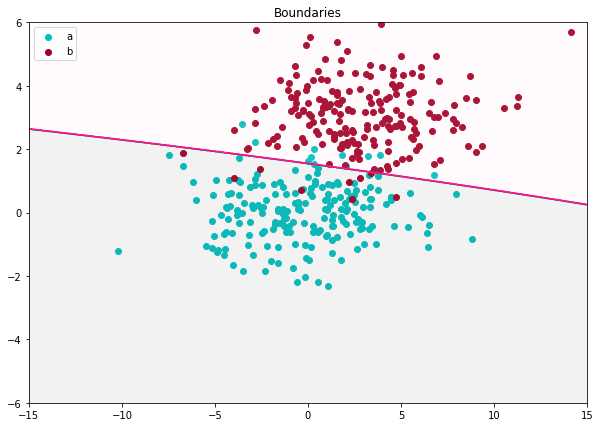

In [19]:
#create a space of 1000x1000 points  
N = 1000
X = np.linspace(-15, 15, N)
Y = np.linspace(-6, 6, N)
X, Y = np.meshgrid(X, Y)
z=[]
# get classes for all points in the mesh grid
z = np.array([mahalanobis_classify(p, [a,b]) for p in zip(np.ravel(X), np.ravel(Y)) ] )
Z = z.reshape(X.shape)

plt.figure(figsize=(10,7))
plt.scatter(a[:,0],a[:,1],color='c')
plt.scatter(b[:,0],b[:,1],color='#a20025')
plt.legend(('a','b'))
#plot contour that represents boundaries between classes
plt.contour( X, Y, Z, 2, alpha = 1, colors = ('cyan','#a20025','#FF1493'))
plt.contourf( X, Y, Z, 2, alpha = .1, colors = ('gray','yellow','#ffdde2ff'))
plt.title('Boundaries')
plt.show()

Finally, we will compare the Mahalanobis approach to the Bayesian one

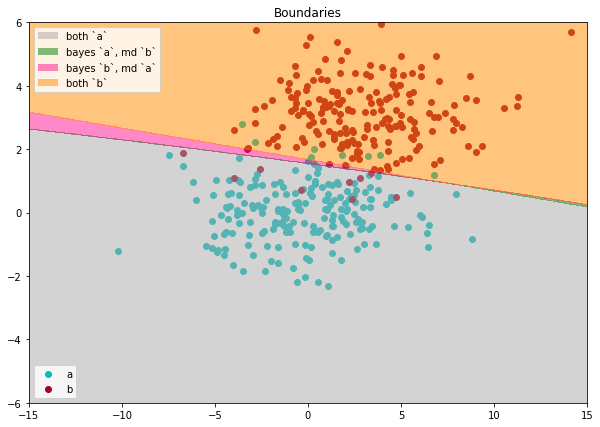

In [48]:
#import math
def calculate_bayes_ab_decision(mu1,mu2, sigma1,sigma2, prior1,prior2, inverse1,inverse2, d1,d2, xx,yy):
    """This function implements calculation of discriminant functions for 2-class.
    It returns values for both of them, g1 and g2 """   
    x=np.array([xx,yy]).reshape(2,1)    
    W1=-0.5*inverse1
    w1=np.dot(inverse1,mu1)#2x1
    w10=-0.5*np.dot(np.dot(mu1.reshape(1,2),inverse1),mu1)-0.5*np.log(d1)+np.log(prior1)
    g1=np.dot(np.dot(x.reshape(1,2),W1),x)+np.dot(w1.reshape(1,2),x)+w10

    W2=-0.5*inverse2
    w2=np.dot(inverse2,mu2)#2x1
    w20=-0.5*np.dot(np.dot(mu2.reshape(1,2),inverse2),mu2)-0.5*np.log(d2)+np.log(prior2)
    g2=np.dot(np.dot(x.reshape(1,2),W2),x)+np.dot(w2.reshape(1,2),x)+w20

    return np.array([g1,g2])   

# create a space od 1000x1000 points  
N = 1000
X = np.linspace(-15, 15, N)
Y = np.linspace(-6, 6, N)
X, Y = np.meshgrid(X, Y)
z=[]

# for bayes
prior1=len(a)/600
prior2=len(b)/600
inverse1=np.linalg.inv(cov1)
inverse2=np.linalg.inv(cov2)
d1=np.linalg.det(cov1)
d2=np.linalg.det(cov2)

# calculate classes for both classifiers
for xx, yy in zip(np.ravel(X), np.ravel(Y)):
    bayes_class = np.argmax(calculate_bayes_ab_decision(mu1.reshape(2,1),mu2.reshape(2,1), 
                                                         cov1,cov2, prior1,prior2,
                                                         inverse1,inverse2, d1,d2, xx,yy))
    mahalanobis_class = mahalanobis_classify((xx,yy), [a,b])
    
    z.append(0 if (bayes_class == 0 and mahalanobis_class == 0) \
             else (1 if (bayes_class == 1 and mahalanobis_class == 0) \
             else (2 if (bayes_class == 0 and mahalanobis_class == 1) \
             else 3)))
z = np.array(z)    
Z = z.reshape(X.shape)

# plot clusters
plt.figure(figsize=(10,7))
plt.scatter(a[:,0],a[:,1],color='c')
plt.scatter(b[:,0],b[:,1],color='#a20025')
l1 = plt.legend(('a','b'), loc='lower left')
# plot contour that represents boundaries between classes according both classifiers
cs = plt.contourf( X, Y, Z, 3, alpha = .5, colors = ('darkgray','green','#FF1493', 'darkorange'))

# plot legends
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections]
plt.legend(proxy, ['both `a`', 'bayes `a`, md `b`', 'bayes `b`, md `a`', 'both `b`'])
plt.gca().add_artist(l1)
plt.title('Boundaries')
plt.show()

We can see significant similarity between the classifiers. However, as would be expected, when using the Mahalanobis distance, the decision boundary fits slightly better to the elliptic shapes of both clusters.

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [2]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [3]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

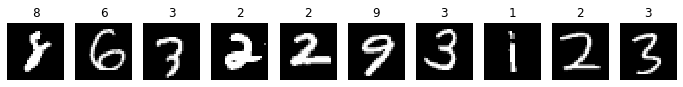

In [4]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP

We implement a MLP using the PyTorch library.

In [5]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset

First, we create a MLP object that creates a simple 2-layer perceptron, which according to the Universal Approximation Theorem, can be used to approximate any continuous function on a bounded domain, provided that the perceptron uses non-polynomial activation functions. The MLP first flattens the 28x28 image into a 1-D array and applies a linear layer with 100 hidden nodes. We then apply a ReLU activation function which, unlike the sigmoid function that we covered in class, does not have vanishing gradients for large positive inputs and therefore works better for gradient descent optimization. Finally, a second linear layer is applied and 10 outputs are produced, corresponding to the 10 digits.

In [6]:
class MLP(nn.Module):
    def __init__(self, nb_hidden=100):
        super(MLP, self).__init__()
        self.main_net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, nb_hidden), 
            nn.ReLU(), 
            nn.Linear(nb_hidden, 10))

    def forward(self, x):
        output = self.main_net(x)
        return output

Next, we create a configuration for the training of the MLP. We set a batch size of 50, meaning that we process 50 samples at a time so that we do not overwhelm the RAM of our devices. We run the training for 50 epochs, meaning that the training is performed on the entire train set 50 times to learn the optimal model parameters (i.e. weights and bias terms of the linear layers). We set a learnig rate of 0.001 to ensure a stable convergence, and a Stochastic Gradient Descent optimizer. We use Cross-Entropy Loss as opposed to simply counting the number of misclassified samples because it takes the degree of certainty of the classified output into account, which enables higher penalties for worse predictions.

In [7]:
class Configuration:
    def __init__(self, seed=42):
        self.batch_size = 50
        self.epochs = 50
        self.lr = 0.001
        self.log_interval = 5
        self.save_model = True
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.criterion = nn.CrossEntropyLoss()
        torch.manual_seed(seed)
        self.model = MLP().to(self.device)
        self.optimizer = optim.SGD(self.model.parameters(), lr=self.lr)
        self.model_name = "mlp"

Next, we define trainig and testing functions for the network. At the end of every epoch, a back-propagation step computes the gradients of the loss with respect to each parameter, and then a Stochastic Gradient Descent step optimizes the parameters accordingly. The training and testing accuracies are reported after every epoch to determine whether training is progressing well or the model is overfitting.

In [8]:
def train(config, train_loader, epoch, logging=True):
    # put model in train mode, we need gradients
    config.model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        config.optimizer.zero_grad()
        output = config.model(data)
        # get the basic loss for our main task
        total_loss = config.criterion(output, target)
        total_loss.backward()
        train_loss += total_loss.item()
        config.optimizer.step()
    _, train_accuracy = test(config, train_loader, logging=False)
    if logging:
        print(f'Train Epoch: {epoch} Loss: {total_loss.item():.6f}, Train accuracy: {train_accuracy}')
    return train_loss, train_accuracy


def test(config, test_loader, logging=True):
    # put model in eval mode, disable dropout etc.
    config.model.eval()
    test_loss = 0
    correct = 0
    # disable grad to perform testing quicker
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(config.device), target.to(config.device)
            output = config.model(data)
            test_loss += config.criterion(output, target).item()
            # prediction is an output with maximal probability
            pred = output.argmax(1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_accuracy = 100. * correct / len(test_loader.dataset)
    if logging:
        print(f'Test set: Average loss: {test_loss:.4f}, '
              f'Test accuracy: {correct} / {len(test_loader.dataset)} '
              f'({test_accuracy:.0f}%)\n')
    return test_loss, test_accuracy

In [9]:
#Create data loaders
config = Configuration()
train_dataset = TensorDataset(torch.from_numpy(train_images), torch.from_numpy(train_labels))
test_dataset = TensorDataset(torch.from_numpy(test_images), torch.from_numpy(test_labels))
train_loader = DataLoader(dataset=train_dataset,
                              batch_size=config.batch_size,
                              shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                              batch_size=config.batch_size,
                              shuffle=True)

In [10]:
#Perform training and test after every epoch
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
for epoch in range(1, config.epochs + 1):
    train_loss, train_acc = train(config, train_loader, epoch, logging=True)
    test_loss, test_acc = test(config, test_loader)
    train_accuracies.append(train_acc)
    train_losses.append(train_loss)
    test_accuracies.append(test_acc)
    test_losses.append(test_loss)

Train Epoch: 1 Loss: 0.349761, Train accuracy: 92.82833333333333
Test set: Average loss: 52.9395, Test accuracy: 9220 / 10000 (92%)

Train Epoch: 2 Loss: 0.176531, Train accuracy: 95.02666666666667
Test set: Average loss: 40.6500, Test accuracy: 9413 / 10000 (94%)

Train Epoch: 3 Loss: 0.082252, Train accuracy: 95.705
Test set: Average loss: 38.5152, Test accuracy: 9428 / 10000 (94%)

Train Epoch: 4 Loss: 0.064353, Train accuracy: 96.35
Test set: Average loss: 34.8370, Test accuracy: 9500 / 10000 (95%)

Train Epoch: 5 Loss: 0.090106, Train accuracy: 96.46833333333333
Test set: Average loss: 34.9782, Test accuracy: 9480 / 10000 (95%)

Train Epoch: 6 Loss: 0.102089, Train accuracy: 97.08333333333333
Test set: Average loss: 32.5105, Test accuracy: 9548 / 10000 (95%)

Train Epoch: 7 Loss: 0.215440, Train accuracy: 97.075
Test set: Average loss: 32.3838, Test accuracy: 9550 / 10000 (96%)

Train Epoch: 8 Loss: 0.034563, Train accuracy: 97.45
Test set: Average loss: 31.3616, Test accuracy: 95

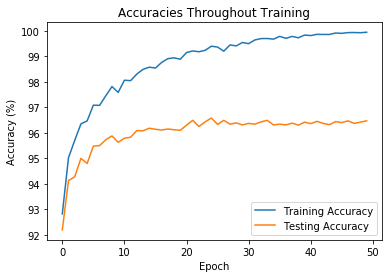

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.legend()
plt.title('Accuracies Throughout Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

We can see that the training accuracy continues to increase with each epoch, while the testing accuracy converges after about 12 epochs. This is normal, since the model is adjusting its weights based on the training data.

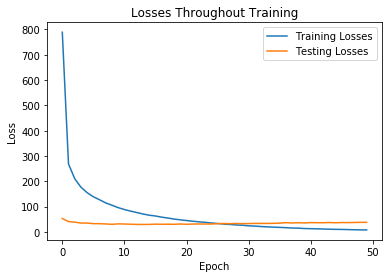

In [12]:
plt.plot(train_losses, label='Training Losses')
plt.plot(test_losses, label='Testing Losses')
plt.legend()
plt.title('Losses Throughout Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

When we plot the losses of the model at each epoch, we see that the training loss continuously decreases, but the testing loss begins to slightly increase after about 25 epochs. This indicates that the model begins to overfit on the training set, meaning that it starts to learn the noise of the training images and performs worse on new, unseen images.

In [13]:
print("Final testing accuracy = {0}%".format(test_accuracies[-1]))

Final testing accuracy = 96.47%
